In [1]:
from PIL import Image

### Linear Regression Analysis

A linear regression is a linear approximation of a casual relationship between two or more variables. Linear regression tries to fit the best line to the given data with make minimum error.

### Equation of Line : 
$$y = mx + c$$
  
$m\Longrightarrow\;Slope \longrightarrow \text{with 1 unit change in x-axis what is the change in y-axis}$
 
$c\Longrightarrow\; \text{Intercept / Error}$

### example for Linear regression:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle

In [3]:
advert = pd.read_csv(r"D:\fullstackdatascience\Linear_Regression\Advertising.csv")
advert

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
advert.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


#### building model between TV and Sales

### Way 1

In [5]:
# scikit learn takes 2-D "input"
x = advert[['TV']]
y = advert['sales']

In [6]:
type(x)

pandas.core.frame.DataFrame

In [7]:
type(y)

pandas.core.series.Series

 we are looking for an equation: $$Sales\;=\;m*TV + c$$ 

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# saving Linearregression class in linear
linear = LinearRegression()

In [10]:
# done to find best value of m and c using fit
linear.fit(x,y)

LinearRegression()

#### value of c using intercept_

In [11]:
# intercept_ gives value of c
linear.intercept_

7.032593549127695

#### value of m using coef_

In [12]:
# coef_ gives value of m
linear.coef_

array([0.04753664])

 we are looking for an equation: $$ Sales\;=\;m*TV + c$$
 
 $$Sales=\;0.0475 * TV + 7.032$$

#### Predicting the 'y' by giving 'x'

In [13]:
linear.predict([[45]])

# when we spend 45 dollars on TV we get Sale of 9.171

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.17174237])

In [14]:
l = [4,5,6,7,89,34,45,67,23]

In [21]:
for i in l:
    prediction = linear.predict([[i]])
    print(prediction)

[7.22274011]
[7.27027675]
[7.31781339]
[7.36535003]
[11.26335455]
[8.64883932]
[9.17174237]
[10.21754846]
[8.12593628]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

**doing same with pickle file**

In [22]:
# to store linear variable in a file

# file = 'linear_reg.sav'
# pickle.dump(linear,open(file,'wb'))

In [23]:
# loading the pickle file

# saved_model = pickle.load(open(file,'rb'))

In [24]:
# saved_model.predict([[45]])

#### accuracy of the model

In [25]:
linear.score(x,y)

# this is wrong thing, just for showing doing it. Don't repeat.

0.611875050850071

---

### Error of the Linear Regression model:

#### Residual is also known as Error

$$Residual\;(r) = y\;-\;\hat y\;\;(actual\;-\;predicted)$$

$$Total\;error\Longrightarrow  \sum_{i=1}^{n} (y\;-\;\hat y)^2$$

Now, for all residuals, sum of all residuals should be minimum or zero.

> __why we square the errors?__
- we want to sum up the error without cancelling each one out and squares is also differentiable at any point but mod graph is not differentiable.

$$\hat y = mx + c$$

$$So,\Longrightarrow \sum_{i=1}^{n} r^2\;=\;\sum_{i=1}^{n} (y\;-\;mx - c)^2$$



$$r^2\;=\;y^2\;+\;m^2x^2+c^2+2mxc\;-\;2ymx-2yc$$

Residual depends on both m and c. So to make error minimum or zero we differentitate wrt to m and c.

$Hint:(a-b-c)^2 = a^2+b^2+c^2-2ab-2bc-2ac$
<br></br>

### Our Aim is to find out the points where residuals are zero.

## Gradient Descent: 

**Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.**

**Our goal is to find out rate of change of residual with respect to "m" and rate of change of residual with respect to "c" and both should be tending to zero so that sum of residuals should be zero**


$$r^2\;=\;y^2\;+\;m^2x^2+c^2+2mxc\;-\;2ymx-2yc$$
$\rightarrow \text{So, differentitating 'r' wrt to 'm'}$

$$\frac{dr}{dm}\;=\;0 + 2mx^2 + 0 + 2xc - 2yx - 0\;\;\Longrightarrow\;2mx^2 + 2xc - 2yx$$

$$\frac{dr}{dm}\;=\;\sum_{i=1}^{n}\;2x(mx + c - y)$$

Our objective is to find out where $\frac{dR}{dm}$ equals to zero and at that point find the value of **m**

$\rightarrow \text{Now, differentiating 'r' wrt to 'c'}$


$$\frac{dr}{dc}\;=\;\sum_{i=1}^{n}\;2c + 2mx - 2y$$

Our objective is to find out where $\frac{dR}{dc}$ equals to zero and at that point find the value of **c**
<br></br>

**NOTE: Gradient Descent solves the problem of Local Minima**

### Gradient Descent Algorithm : 

https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931


##### So to get best and new value of m and c everytime for a new line y = mx + c 

$$m_{new}\;=\;m_{old}\;-\;\eta\;*\;\;\frac{1}{n}\;*\;\;\sum_{i=1}^{n} (y\;-\;\hat y)*x$$

$$c_{new}\;=\;c_{old}\;-\;\eta\;*\;\;\frac{1}{n}\;*\;\;\sum_{i=1}^{n} (y\;-\;\hat y)$$

$where\;\sum_{i=1}^{n} (y\;-\;\hat y)\;is\;the\;residual\;(r)$

<br></br>
**So, the equation of line where value of residual is zero:**

$$new\;slope\;(m_{new}) = m_{old}-\eta * (\Delta E_m)$$

$$new\;intercept\;(c_{new}) = c_{old}-\eta * (\Delta E_c)$$

$where\;(\Delta E_m)\;and\; (\Delta E_c)\;means\;where\;value\;of\;m\;and\;c\;=\;0$

$and\;\eta \;is\;the\;learning\;rate\;which\;helps\;control\;changes$

- $and\;after\;dividing\;\frac{dR}{dm}\;and\;\frac{dR}{dc}\;by\;2\;we\;get$

 $\Delta E_m = mx^2 + xc -xy$

 $\Delta E_c = c + mx -y$
 
 $which\;is\;our\;error\;term$
<br></br> 
 **NOTE: Finding new values of m and c is known as Learning**

### Cost function:

$$J(m, c) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - (mx_i + c))^2$$

Where:
- $J(m, c)$ is the cost function, which measures how well the linear regression model with parameters \(m\) and \(c\) fits the data.
- n is the number of data points.
- $y_i$ is the observed (actual) value of the dependent variable for the $i^{th}$ data point.
- $x_i$ is the $i^{th}$ independent variable (input feature).
- m is the slope of the linear regression model.
- c is the intercept (y-intercept) of the linear regression model.

The goal of gradient descent is to find the values of __m__ and __c__ that minimize this cost function, which effectively minimizes the error between the predicted values $mx_i + c$ and the actual values $y_i$.

---
---

### Assumption to follow for Linear Regression

1. There should be a Linear relationship between every variable(x) and Target(y).


2. When Mean of residual = 0 and Standard deviation = 1 and mean should follow normal distribution.


3. Error terms are not supposed to be correlated with each other Known as **Autocorrelation of Residuals**


4. Independent variables (x) and residual are supposed to be uncorrelated known as **Exogeneity**.


5. Error term must showcase constant Variance i.e constantly changing known as **Homoscedasticity**.


6. There should not be any **Multicollinearity** (x_1 and x_2 should not be correlated). VIF should be between 1 and 5


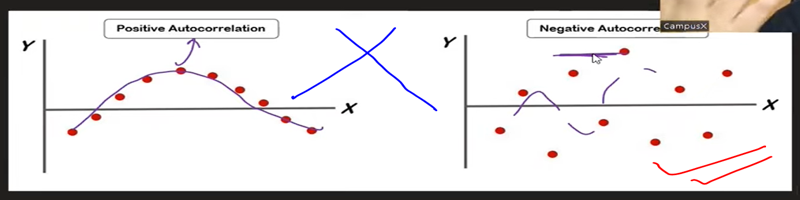

In [4]:
auto_correlation = Image.open(r'C:\Users\mohit.kumar\Pictures\DS\auto_correlation.png')
auto_correlation.resize((800,200))

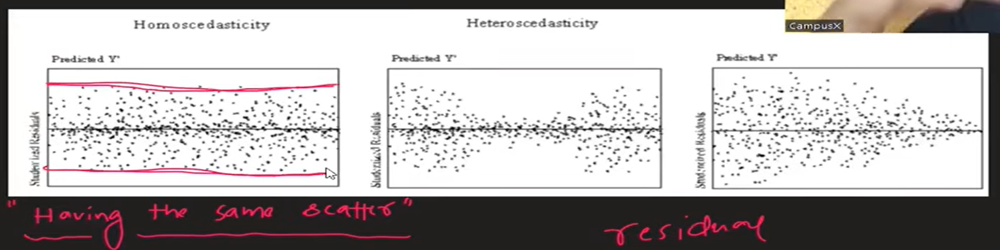

In [5]:
homoscedasticity = Image.open(r'C:\Users\mohit.kumar\Pictures\DS\homos.png')
homoscedasticity.resize((1000,250))

##### 1. Linearity

The linear regression is the simplest non-trivial relationship. It is called linear because the equation is linear.
$$\gamma = \beta_0\;+\;\beta_1x_1\;+\;\beta_2x_2\;+.....\;+\;\beta_kx_k\;+\;\epsilon$$

Each independent variable is multiplied by a coefficient and summed up to predict the value of the dependent variable.

**How can you verify if the relationship between two variables is linear?**

The easiest way is to choose an independent variable $x_1$ and plotted against the dependent $y$ on a scatterplot, if the data points form a pattern that looks like a straight line, then a linear regression model is suitable.




##### 2. No endogeneity

It is the prohibition of a link between the independent variables(x) and the errors $(\epsilon)$

$$\sigma_{x\epsilon} = 0 : \forall\;x ,\epsilon\;\;\;$$ 

Error $(\epsilon)$ which is the difference between the observed values and the predicted values is correlated with our independent values(x).
This is a problem referred to as a **Ommitted variable bias.**

Omitted Variable Bias is introduced to the model when you forget to include a relevant variable. 
- $y\;X\;x\rightarrow$ y is explained(somewhat correlated) by x's.
    - As each independent variable(x) explains why they move together and are somewhat correlated.
- $y\;X\;x^*\rightarrow$ y is explained(somewhat correlated) by omitted x's. 
    - y is also explained by the ommited variable, so they are also correlated.
- $x\;X\;x^*\rightarrow$ x and $x^*$ are somewhat correlated
    - Chances are the omitted variable$(x^*)$ is also correlated with at least one independent x.
    
    
However, you forgot to include it as a regressor. Everything that you don't explain with your model goes into the air. So actually the error becomes correlated with everything else. $x\;X\;\epsilon \rightarrow$ x and $\epsilon$ are somewhat correlated.
        
        Q. The easiest way to detect an omitted variable bias is through:
> Omitted variable bias occurs when you forget to include a variable. This is reflected in the error term as the factor you forgot about is included in the error. In this way, the error is not random but includes a systematic part (the omitted variable).


##### 3. Normality and Homoscedasticity of the error term

$$\epsilon\;\sim\;N\;(0,\sigma^2)$$

It contains:
* Normality $(N)$ :  we assume the error term is normally distributed. Normal distribution is not required for creating the regression, but for making inferences, remember, all regression tables were full of t-statistics and f-statistics. Well, these things work because we assume normality of the error term.

    * What should we do if the error term is not normally distributed?

    * The central limit theorem applies for the error terms too. Therefore, we can consider normality as a given for us.
    
    
* Zero mean $(0)$ of error terms: If the mean is not expected to be zero, then the line is not the best fitting one. However, having an intercept solves that problem. So in real life, it is unusual to violate this part of the assumption.

* Homoscedasticity $(\sigma^2)$: It means to have equal variance, so the error term should have equal variance one with the other.

$${\sigma^2}_{\epsilon_1}={\sigma^2}_{\epsilon_2}={\sigma^2}_{\epsilon_3}=....={\sigma^2}_{\epsilon_k}=\sigma^2$$

Heteroscedasticity example: Most examples related to income are heteroscedasticity with varying variance, if a person is poor, he or she spends a constant amount of money on food, entertainment, clothes, etc.the wealthier an individual is, the higher the variability of his expenditure.
<br></br>

*Ways to overcome Heteroscedasticity:*

- Look for omitted variable bias (OVB)
<br></br>
- Look for outliers and try to remove them.
<br></br>
- **The Log transformation :** 
    - for each observation in the dependent variable, calculate its natural log. 
    - Then create a regression between the log of y and the independent xs. 
    - Conversely, you can take the independent x that is causing you trouble and do the same.

##### 4. NO AUTOCORRELATION or NO SERIAL CORRELATION OF ERROR TERMS
<br></br>
Errors are assumed to be uncorrelated.

$$\sigma_{\epsilon_i \epsilon_j} = 0\;:\;\forall\;i \neq j$$
<br></br>

Its very common in time series data.

       Q. how does one detect autocorrelation?
> - A common way is to plot all the residuals on a graph and look for patterns. If you can't find any, you're safe.

<br></br>
  - Another is the **Durban Watson test**, which is in the summary for the table provided by stats models.
  - Generally, its values fall between 0 and 4.
> 2 $\longrightarrow$ indicates no-autocorrelation .
Below 1 and above 3 is a cause for alarm.

- The only thing you can do is avoid using a linear regression in such a setting. There are other types of regressions that deal with Time series data. It is possible to use an auto regressive model, a moving average model, or even an auto regressive moving average model or auto regressive, integrated moving average model.

>Autocorrelation is not observed in cross-sectional data. You usually spot it at time series data, which is a subset of panel data.

##### 5. NO MULTICOLLINEARITY FOR X variables

 $$\;\;\rho_{x_i x_j} \neq 1 : \forall\;i,\;j;\;i\neq j$$
 
 we observe multicolinearity when two or more variables have a high correlation. 
 
 eg:  a= 2 + 5 * b
 
 a and b are two variables with an exact linear combination.
 
 so 'a' can be expressed using 'b' and vice-versa. so $\;\rho_{ab} > 5\;(perfect\;multicolinearity)$ which is a problem for the regression model as the coefficients will be wrongly estimated. The reasoning is that if 'a' can be represented using 'b', there is no point using both. We can just keep one of them.
 
     How to fix it?
     
     * Drop one of the variable.
     * Transform them into one (e.g average price)
     
>Before creating the regression. Find the correlation between each two pairs of independent variables and you will know if a multiple linearity problem may arise.

***

### Determinants of a Good Regression:

Based on Anova framework.

1. **Residual Summation of Square/ Sum of squares errors**

$$Denoted\;by\; RSS\;or\;SSE\; = \;\sum_{i=1}^n (y - \hat y)^2 =\sum_{i=1}^n e_i^2$$

The error is the difference between the observed value and the predicted value. 

__We usually want to minimize the error, the smaller the error, the better the estimation power of the regression.__

Also known RSS residual sum of squares, residual as in remaining or unexplained.

Same as $(\Delta E_m)\;and\; (\Delta E_c)$ for value of m and c.
<br></br>

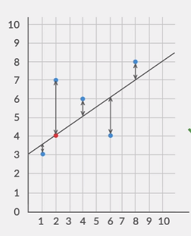

2. **Total Summation of Squares / Sum of squares total:**

$$Denoted\;by\; TSS\;or\;SST\; = \;\sum_{i=1}^n (y_i - y_{avg})^2$$

The squared differences between the observed dependent variable  $(y)$ and its mean $(y_{avg})$.

It can be interpreted as the dispersion of the observed variables around the mean, much like the variance we saw in descriptive statistics. It is a measure of the total variability of the data set here.

**NOTE: TSS is a constant term which never depends on the line, it depends on the data. It is the maximum distance between a data point and a plane** 

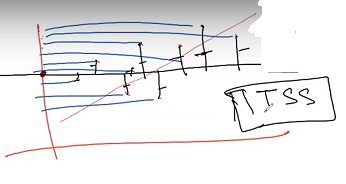

3. **Sum of squares regression:**

$$Denoted\;by\; SSR\;or\;ESS\; = \;\sum_{i=1}^n (\hat y_i - \bar y)^2$$

It is the sum of the differences between the predicted value and the mean of the dependent variable. Think of it as a measure that describes how well your line fits the data.

__If this value of SSR is equal to the total sum of squares, it means your regression model captures all the observed variability and is perfect.__

Also known as ESS explained sum of squares.

### Connection between all

$$TSS\;=\;SSR\;+\;RSS$$

$$\sum_{i=1}^n (y_i - \bar y)^2\;\;=\;\;\sum_{i=1}^n (\hat y_i - \bar y)^2\;\;+\;\;\sum_{i=1}^n e_i^2$$

$$Total\;variability\;of\;the\;dataset\;=\;variability\;explained\;by\;the\;regression\;line\;+\;unexplained\;variability\;known\;as\;error$$

>Given a constant total variability, a lower error will cause a better regression. Conversely, a higher error will cause a less powerful regression.


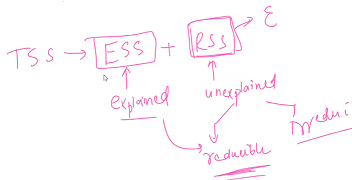

***

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

## Regression Metrics:

- __MSE (Mean Squared Error) :__ It calculates the average of squared differences between predicted and actual values, giving more weight to large errors, making it useful for detecting outliers.


- __RMSE (Root Mean Squared Error) :__ It's the square root of MSE, providing a measure of prediction error in the same units as the target variable, making it easier to interpret.



- __MAE (Mean Absolute Error) :__ It measures the average absolute difference between predicted and actual values, providing a straightforward assessment of prediction accuracy.



- __$R^2$ Score (Coefficient of Determination) :__ It represents the proportion of variance in the dependent variable that is explained by the independent variables in a regression model, ranging from 0 to 1.


- __Adjusted $R^2$ Score :__ It adjusts R² by penalizing the inclusion of irrelevant predictors, offering a more accurate representation of model fit in multiple regression by accounting for the number of predictors.

### Mean Squared Error (MSE)

As the name implies, Mean Squared Error (MSE) is the __mean of the residuals (error) squared.__ 


The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function. 


$$MSE\;=\;\frac{\sum_{i=1}^n\;(y_i\;-\;\hat y_{i})^2}{n}$$


$$MSE\;=\;\frac{1}{n}\;\sum_{i=1}^n\;(y_i\;-\;\hat y_{i})^2$$

___To calculate MSE, we need to calculate :___

- Explained Sum Of Squares (ESS)


- Sum Of Squared Residuals (SSR)


- Total Sum of Squares, (TSS)

$$TSS\;=\;SSR\;+\;RSS$$








**Advantages:**

- Can be used as Loss function as it is differentiable


**Disadvantage**

- MSE unit comes in squared form and it is difficult to interpret.


- Not good with handling outliers. Not robust to Outliers.

### Root mean squared error (RMSE)

RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.

$$RMSE\;=\;\sqrt{MSE}$$


$$RMSE\;=\;\sqrt{\frac{1}{n}\;\sum_{i=1}^n\;(y_i\;-\;\hat y_{i})^2}$$


**Advantages:**

- RMSE is of the same unit as the output


**Disadvantages:**

- Not robust to outliers

### Mean Absolute Error (MAE)



It is the mean of difference between the predicted value and actual value. 

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

$$MAE\;=\;\sum_{i=1}^{n}\;\frac{|y_i\;-\;\hat y_{i}|}{n}$$

$$MAE\;=\;\frac{1}{n}\;\sum_{i=1}^{n}\;|y_i\;-\;\hat y_{i}|$$

***NOTE: Mean Absolute Error should be least***

**Advantages:**

- Unit of MAE and unit of output column is same.


- It's robust to outliers ie. it can handle it.

<br></br>
**Disadvantages:**

- Modulus function graph is not differentiable at 0.

### R-Squared Statistics

$$R^2\;measures\;goodness\;of\;fit$$
<br></br>
***The R-squared is a proportion that shows how much of the total variability of the dataset is explained by your regression model.*** 

- This may be expressed as: **how well your model fits your data**. 


- It is incorrect to say your regression line fits the data, as the line is the geometrical representation of the regression equation. 



- It also incorrect to say the data fits the model or the regression line, as you are trying to explain the data with a model, not vice versa.
<br></br>

#### The formula for the R² score is as follows:

$$R^2 = 1 - \frac{SSR}{SST}$$

$$\;OR$$


$$R^2\;=\;1\;-\;\frac{RSS}{TSS}$$

Where:

- $R^2$ is the R² score.


- $SSR$ is the sum of the squared residuals (also known as the sum of squared errors or __SSE__), which represents the variance that the model does not explain. ___Summation of distance between $y\;and\;\hat y$___


- $SST$ is the total sum of squares, which represents the total variance in the dependent variable. ___Summation of distance between $y\;and\;y_{avg}$ line.___


- *SST is a constant line which depends on your data*


$$R^2 \propto \frac{1}{RSS}$$

___The interpretation of the R² score is as follows:___


- $R^2 = 1$: The model explains all of the variance in the dependent variable, indicating a perfect fit.


- $R^2 = 0$: The model does not explain any of the variance in the dependent variable, indicating that it doesn't provide a better prediction than simply using the mean of the dependent variable.


- $0 < R^2 < 1$: The model explains a proportion of the variance in the dependent variable, with higher values indicating a better fit.

The $R^2$ value ranges from 0.2 to 0.9

#### Problem with $R^2$ score:

R-squared can be misleading in some cases, especially when the number of
predictor variables is large or when the predictor variables are not relevant to the response variable.

### Adjusted R-squared

It is the modified version of R-squared which is adjusted for the number of variables in the regression. It increases only when an additional variable adds to the explanatory power to the regression.


$$Denoted\;by\; \bar R^2$$

$$Adjusted\;R-squared\;=\;1- \Biggl[ \frac{\big(1-R^2\big) * (n-1)}{n-k-1}\Biggl]$$

$where$ 

n – Number of points or rows in your data set.

k – Number of independent variables \features \ predictors in the model, excluding the constant

$$OR$$

$$Adjusted\;R^2\;\;=\;\frac{MSS}{TSS}\;=\;\frac{TSS\;–\;RSS}{TSS}$$

$where$

$TSS\;–\;Total\;Sum\;of\;Squares\;=\;Σ(Y_i – Y_m)^2$

$MSS\;–\;Model\;Sum\;of\;Squares\;=\; Σ (\hat Y – Y_m)^2$

$RSS\;–\;Residual\;Sum\;of\;Squares\;=\; Σ (Yi – \hat Y)^2$

where $\hat Y$ is the predicted value of the model, $Y_i$ is the ith value and $Y_m$ is the mean value


<br></br>
$$\star\;\;\bar R^2\; < \; R^2 $$
$$\bar R^2\;measures \;how \;well \;your \;model\; fits\; the\; data\; but\; penalizes\;excessive\;use\;of\;variables.$$

    Q. What can you tell about a new parameter if adding it increases R-squared but decreases adjusted R-squared
>The variable can be omitted since it holds no predictive power.

### Difference between R-square and Adjusted R-square

1. Every time you add a independent variable to a model, the R-squared increases, even if the independent variable is insignificant. It never declines. Whereas Adjusted R-squared increases only when independent variable is significant and affects dependent variable. 


2. Adjusted r-squared can be negative when r-squared is close to zero.


3. Adjusted r-squared value always be less than or equal to r-squared value.

#### Which one should be used?

1. __Model comparison :__ If you're comparing models with different numbers of predictor
variables, it's better to __use adjusted R-squared.__ This is because adjusted R-squared takes
into account the complexity of the model, penalizing models that include irrelevant
predictor variables.


2. __Model interpretation :__ If you're interested in understanding the proportion of variance in the response variable that can be explained by the predictor variables in the model, __R-
squared can be a useful metric.__ However, keep in mind that R-squared does not provide information about the significance or relevance of individual predictor variables. It's also
important to remember that a high R-squared value does not necessarily imply causation
or a good predictive model.



3. __Model selection and overfitting :__ When building a model and selecting predictor variables,
it's important to guard against overfitting. __Adjusted R-squared__ can be a
helpful metric, as it accounts for the number of predictor variables and penalizes the
model for unnecessary complexity.By using adjusted R-squared, you can avoid including
irrelevant predictor variables that might lead to overfitting.

##### Which is better?
    
>Adjusted R-square should be used to compare models with different numbers of independent variables. Adjusted R-square should be used while selecting important predictors (independent variables) for the regression model.

### MAE vs MSE

The main difference between MAE (Mean Absolute Error) and MSE (Mean Squared Error) lies in how they measure the error or loss in a predictive model:

##### **MAE (Mean Absolute Error):**
   
   
   - MAE calculates the average of the __absolute differences__ between predicted and actual values.
   
   
   - MAE treats __all errors (overpredictions and underpredictions) equally__ and provides a linear measure of error.
   
   
   - Use MAE when you want a straightforward measure of the average magnitude of errors and you __don't want to give more weight to large errors.__ It's more robust to outliers in the data.

   Example: MAE is suitable for evaluating the performance of a model predicting house prices, where you want to know the average dollar amount by which your predictions differ from the actual sale prices.



##### **MSE (Mean Squared Error):**
   
   
   - MSE calculates the average of the __squared differences__ between predicted and actual values.
   
   
   - MSE gives __more weight to large errors__ because of the squaring, making it __sensitive to outliers.__
   
   
   - Use __MSE when you want to penalize larger errors more__ and when you want a measure that emphasizes reducing the spread of errors.

   Example: MSE is commonly used in training machine learning models because it helps models focus on minimizing errors, including outliers.

#### When should we use MAE or MSE?

- Choose MAE when you want a measure of the average magnitude of errors that treats all errors equally.


- Choose MSE when you want a measure that gives more weight to larger errors and is commonly used for model training and optimization. 

### MAE vs RMSE

**Similarities:** 

- Both MAE and RMSE express average model prediction error in units of the variable of interest.


- Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means lower values are better.

> RMSE does not necessarily increase with the variance of the errors. RMSE increases with the variance of the frequency distribution of error magnitudes.

***

### Variance Inflation factor (VIF) - To check the MULTICOLLINEARITY

Sklearn doesnot have any method to check this assumption. We must turn to our old friend stats models.

One of the best ways to check for Multicollinearity in the air is through **VIF or Variance Inflation factor.** 

VIF produces a measure which estimates how much larger the square root of the standard error of an estimate is compared to a situation where the variable was completely uncorrelated with the other predictors.

$$Formula\;=\;\bigg( \frac{1}{1-R^2}\bigg)$$

$VIF\;\epsilon\;[1, +inf]$

- $VIF\;=\;1\longrightarrow\; no\;multicollinearity$ 


- $1\;<\;VIF\;<\;5\longrightarrow\; perfectly\;okay$ 


- $VIF\;>\;5\;\longrightarrow\;highly\;collinear$

This is also the minimum value of the measure. Generally, values between one and five are considered perfectly okay.

You'd rarely find data so perfect that all features have a VIF below five, so that is somewhat conservative.

**Note on Multicollinearity:**
>What most people are wondering is not 'when do we have multicollinearity' as we usually do have some. The better question to ask is 'When can we safely ignore multicollinearity'.

Here's a great article on the topic: http://statisticalhorizons.com/multicollinearity

### Feature Scaling (Standardization):

If the data dispersion is varying a lot, then the model will not be able to understand the relation wrt features and label in a better way. So to find a strong and bettwer relation between feature and label we use StandardScaler. 

It is the process of transforming the data we are working with into a standard scale.


$$standardized\;value\;=\;\frac{\chi - \mu}{\sigma}$$

$$where\; \chi \rightarrow\;original\;variable,\;\; \mu \rightarrow\;mean\;of\;the\;original\;variable,\;\;\sigma\rightarrow\;standard\;deviation\;of\;original\;variable$$

**The formula for standardization is same as formula for Z-statistics i.e where $\mu\;=\;0\;and\;\sigma\;=\;1$**


This translates to subtracting the mean and dividing by the standard deviation. In this way, regardless of the data set, we will always obtain a distribution with a mean of zero and a standard deviation of one which could easily be proven.

This will ensure our linear combinations treat the two variables equally.


##### by standarard scaling now we can see that for features mean = 0 and standard deviation = 1

___

### Bias :

- *DEF:* The inability of a Machine Learning Model to truly capture the relationship in the **training data.** 


- Let’s assume we have trained the model and are trying to predict values with input ‘x_train’. The predicted values are y_predicted. Bias is the error rate of y_predicted and y_train.


- When the error rate is high, we call it High Bias and when the error rate is low, we call it Low Bias


- **In simple terms,think of bias as the error rate of the training data.**

### Variance:

- *DEF:* Difference of fit on different datasets.


- Let’s assume we have trained the model and this time we are trying to predict values with input ‘x_test’. Again, the predicted values are y_predicted. Variance is the error rate of the y_predicted and y_test


- When the error rate is high, we call it High Variance and when the error rate is low, we call it Low Variance


- **In simple terms, think of variance as the error rate of the testing data.**

## Overfitting and Underfitting

<br></br>
**Overfitting :** 
- It means our regression has focused on the particular data set so much it has missed the point.


- Low Bias and High Variance


- It has high train accuracy. Performs well with training Dataset called **LOW BIAS** but fails to perfrom well with test data called **HIGH VAIRIANCE**


- Overfitting refers to models that are so super good at modeling the data that they fit or at least come very near each observation. The problem is that the random noise is captured inside an overfitting model.


<br></br>

**Underfitting :** 

- It means the model has not captured the underlying logic of the data. It doesn't know what to do and therefore provides an answer that is far from correct.


- High Bias and Low Variance


- It has low train model accuracy. Performs bad with training Dataset called **HIGH BIAS** and even fails to perfrom well with test data called **LOW VARIANCE**


- We can certainly say a linear model would be an underfitting model, it provides an answer, but does not capture the underlying logic of the data. It doesn't have strong predictive power. Under fitted models are clumsy and have a low accuracy, you will quickly realize that either there are no relationships to be found.

<br></br>

Now, underfitting is easy to spot, you have almost no accuracy whatsoever, overfitting is much harder, though, as the accuracy of the model seems outstanding.

<br></br>

https://towardsdatascience.com/bias-variance-and-how-they-are-related-to-underfitting-overfitting-4809aed98b79

This can lead to the following scenarios:

- Low bias, low variance: Aiming at the target and hitting it with good precision.


- Low bias, high variance: Aiming at the target, but not hitting it consistently.


- High bias, low variance: Aiming off the target, but being consistent.


- High bias, high variance: Aiming off the target and being inconsistent.

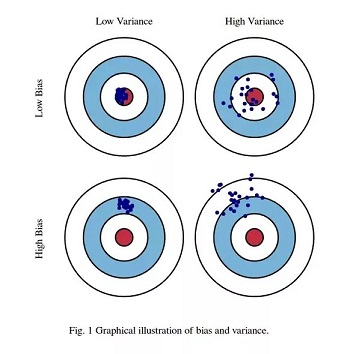

**Solution to Overfitting:**

We can split their initial data set into two training and test splits, like 90 percent training and 10 percent test or 80, 20 are common. 

It works like this, we create the regression on the training data after we have the coefficients,
we test the model on the test data by assessing the accuracy. The whole point is that the model has never seen the test data set, therefore it cannot overfit on it.

<br></br>
It makes sense to split our data into two parts training and testing, we train the model on the training data set and then check how well it behaves on the testing one.
Ultimately, we are trying to avoid the scenario where the model learns to predict the training data very well, but fails miserably when given new samples.

### Bias Variance Trade-Off

Our target is Low Bias and Low Variance

In Bias Varaince tradeoff we select the model which not overfitting nor underfitting i.e it is not good in anything but not bad any in anything.

We select model with High bias for Low variance

we use the following methods for it:

- Regularization

- Bagging

- Boosting
    

***

## Difference betweeen Normalization vs. Standardization

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.


- Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.


There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.


***It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.***

___

#### Difference in Correlation and Regression:
<br></br>
* First, correlation measures the degree of relationship between two variables. Regression analysis is about how one variable affects another or what changes it causes to the other.
<br></br>
* Second, correlation doesn't capture causality, but the degree of interrelation between the two variables. Regression is based on causality. It shows no degree of connection but causality i.e cause and effect.
<br></br>
* Third, a property of correlation is that the correlation between $\rho(x,y)$ is the same as between $\rho(y,x)$. This you can easily see from the formula, which is symmetrical. Regressions of (y,x) and (x,y) yield different results. Think about our example with income and education, predicting income based on education makes sense, but the opposite does not.
<br></br>
* Finally, the two methods have a very different graphical representation, linear regression analysis is known for the best fitting line that goes through the data points and minimizes the distance between them, while correlation is a single point.

    1)Why regression only on one variable?

The variable we want to predict is only one - price, in the regression however we use all the other variables too - they are the predictors (the variables we use to predict the price). That is how our data is divided into two sets - the targets(price) and inputs(everything else).


    2)Why are we using train test split with log values of price only

In order to relax the linearity assumption, we had to transform the prices variable into log prices. After doing so, we saw that the relationships between log prices and year, engine volume and millage respectively, were way closer to linear. This was shown in lecture 227.

    3)What is the real reason of train test split here?

The train_test_split function simply splits our data into two sets - training set and testing set. The training set is the data we use to fit our regression and the testing set is the data we use to see if our regression model works accurately. Because we already split our data into two (targets and inputs) we finally have 4 sets.


x_train is the set of training inputs and y_train is the set of training outputs - they are used together to fit the regression.

x_test is the set of testing inputs and y_test is the set of testing outputs - x_test is used in the predict method of our already trained regression to obtain a certain output y_hat, and y_test is the target to which we have to compare y_hat.

Here is our lecture on train - test split.

    4)What is the purpose of the dummy variables?

Their purpose is the same as all other input variables - to predict the price. Since brand is a categorical variable and we couldn't use it directly in our regression model, we split it into dummy variables, which you can imagine is just like a normal variable, but it takes a value of 0 or 1, and in a set of dummy variables ( such as the brand set - Brand_BMW, Brand_Mercedes...) for a given sample only one of them can be 1 and the rest have to be 0, because a single car can only have a single brand.

___

# Problem Statement

link to the problem statement : https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

Attribute Information:

The dataset consists of 10 000 data points stored as rows with 14 features in columns
UID: unique identifier ranging from 1 to 10000
product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes
tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.
power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail

___

## HOUSING PRICE DATASET

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
from sklearn.datasets import load_boston

In [117]:
df = load_boston()
df

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [118]:
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names

In [119]:
dataset['Price'] = df.target

In [120]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [121]:
# dividing the dataset into independent and dependent features

x = dataset.iloc[:,:-1] # independent features
y = dataset.iloc[:,-1] # depdepndent feature

In [122]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [123]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

#### Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [125]:
lin_reg = LinearRegression()
mse = cross_val_score(lin_reg,x,y,scoring='neg_mean_squared_error', cv = 5)
mean_mse = np.mean(mse)
print(mean_mse)

-37.13180746769922


lin_reg.predict()

#### Ridge

In [126]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# GridSearchCV will help with hyper parmeter tuning

In [127]:
ridge = Ridge()

In [128]:
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1e-1, 1,5,10,20]}

In [129]:
ridge_regressor = GridSearchCV(ridge, params, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20]},
             scoring='neg_mean_squared_error')

In [130]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-32.38025025182518


In [131]:
# changing value of alpha

params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1e-1, 1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge, params, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [132]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.905701947540372


#### Lasso

In [133]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [134]:
lasso = Lasso()

In [135]:
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1e-1, 1,5,10,20]}

lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(x,y)

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20]},
             scoring='neg_mean_squared_error')

In [136]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.1}
-34.83043231820268


In [137]:
# changing value of alpha

params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1e-1, 1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(x,y)

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [138]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.1}
-34.83043231820268


## splitting

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [141]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27


In [142]:
# linear Regression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
mse = cross_val_score(lin_reg,x_train,y_train,scoring='neg_mean_squared_error', cv = 5)
mean_mse = np.mean(mse)
print(mean_mse)

-25.18787473928509


In [143]:
# prediction

y_pred = lin_reg.predict(x_test)

In [144]:
from sklearn.metrics import r2_score

In [145]:
r2_score1 = r2_score(y_test,y_pred)
r2_score1

0.7261570836552478

In [146]:
# Ridge

params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1e-1, 1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge, params, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(x_train,y_train)# prediction

y_pred = ridge_regressor.predict(x_test)

from sklearn.metrics import r2_score

r2_score1 = r2_score(y_pred,y_test)
r2_score1

0.6708743257533071

In [147]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-25.186899367386985


In [148]:
# prediction

y_pred = ridge_regressor.predict(x_test)

In [149]:
from sklearn.metrics import r2_score

In [150]:
r2_score1 = r2_score(y_pred,y_test)
r2_score1

0.6708743257533071

In [151]:
# lasso

params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1e-1, 1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(x_train,y_train)

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.720e+03, tolerance: 2.284e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.028e+03, tolerance: 2.493e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [152]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-25.187874739285043


In [153]:
y_pred = lasso_regressor.predict(x_test)

In [154]:
from sklearn.metrics import r2_score

In [155]:
r2_score1 = r2_score(y_pred,y_test)
r2_score1

0.6709558976744427